In [5]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import io
import PIL
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
# function for displaying image
def display(img):
    plt.figure(figsize=(5,5))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving optimal_thre_input.jpg to optimal_thre_input (2).jpg


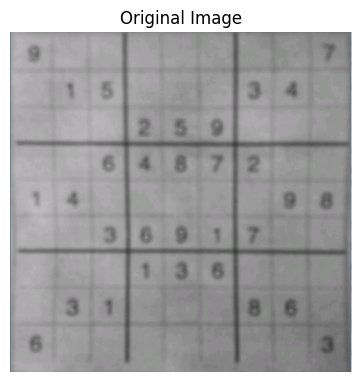

In [ ]:
image_bytes = uploaded['optimal_thre_input (2).jpg']

# Open the image from bytes
original_image = Image.open(io.BytesIO(image_bytes))

# Convert the image to a NumPy array
original_image_array = np.array(original_image)

plt.figure(figsize=(15, 5))
# Original image
plt.subplot(1, 3, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

## Optimal Thresholding

### Global

In [ ]:

def global_thresholding(image, t):
    """
    Apply global thresholding on the input image to create a binary image.

    Parameters:
    - image: the input image to be thresholded
    - t: the threshold value

    Returns:
    - final_img: the binary image after thresholding
    """
    # If the image is colored, change it to grayscale, otherwise take the image as it is
    if (image.ndim == 3):
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    elif (image.ndim == 2):
        gray = image

    # Applying the threshold on the image whether it is calculated or given by the user according to the previous condition
    final_img = gray.copy()
    final_img[gray > t] = 255
    final_img[gray < t] = 0

    return final_img

In [ ]:
def local_thresholding(image):
    """
    Apply local thresholding on the input image to create a binary image.

    Parameters:
    - image: the input image to be thresholded
    - t1: the threshold value for the top-left section of the image
    - t2: the threshold value for the top-right section of the image
    - t3: the threshold value for the bottom-left section of the image
    - t4: the threshold value for the bottom-right section of the image

    Returns:
    - final_img: the binary image after thresholding
    """
    # If the image is colored, change it to grayscale, otherwise take the image as it is
    if (image.ndim == 3):
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    elif (image.ndim == 2):
        gray = image

    height, width = gray.shape # get the height and width of the image
    # In this case we will divide the image into a 2x2 grid image
    half_height = height//2
    half_width = width//2

    # Getting the four section of the 2x2 image
    section_1 = gray[:half_height, :half_width]
    section_2 = gray[:half_height, half_width:]
    section_3 = gray[half_height:, :half_width]
    section_4 = gray[half_height:, half_width:]


    thresholds = optimal_thresholding(image)
    t1 = thresholds[0]
    t2=thresholds[1]
    t3=thresholds[2]
    t4= thresholds[3]
    # Applying the threshold of each section on its corresponding section
    section_1[section_1 > t1] = 255
    section_1[section_1 < t1] = 0

    section_2[section_2 > t2] = 255
    section_2[section_2 < t2] = 0

    section_3[section_3 > t3] = 255
    section_3[section_3 < t3] = 0

    section_4[section_4 > t4] = 255
    section_4[section_4 < t4] = 0

    # Regroup the sections to form the final image
    top_section = np.concatenate((section_1, section_2), axis = 1)
    bottom_section = np.concatenate((section_3, section_4), axis = 1)
    final_img = np.concatenate((top_section, bottom_section), axis=0)

        # final_img = gray.copy()
        # final_img[gray > t] = 255
        # final_img[gray < t] = 0

    return final_img

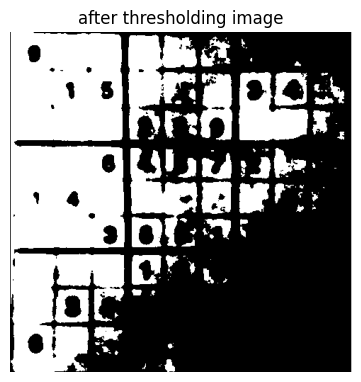

In [ ]:
import numpy as np
import cv2 as cv

def optimal_thresholding(image):
    # Convert the image to grayscale if it's not already
    if len(image.shape) > 2:
        image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    # Select the background pixels from the four corners of the image
    background_pixels = np.array([image[0, 0], image[0, -1], image[-1, 0], image[-1, -1]])


    # Define the remainder as object pixels
    object_pixels = image.ravel()
    object_pixels = object_pixels[~np.isin(object_pixels, background_pixels)]

    # Initialize threshold value
    threshold = 0

    # Start the iterative process
    while True:
        # Compute mean background and object gray-level
        mean_background = np.mean(background_pixels)
        mean_object = np.mean(object_pixels)

        # Calculate new threshold
        new_threshold = (mean_background + mean_object) / 2

        # If threshold doesn't change, break the loop
        if abs(new_threshold - threshold) < 0.01:
            break

        threshold = new_threshold

        background_pixels = image[image < threshold]
        object_pixels = image[image > threshold]

        # Apply the final threshold to the image
        binary_image = global_thresholding(image,threshold)


    return binary_image


after_thresholding_image = optimal_thresholding(original_image_array)
# # Example usage
# input_img = cv.imread('your_image_path.jpg')
# output_img = optimal_thresholding(input_img)
# cv.imwrite('optimal_thresholding_output.png', output_img)

plt.figure(figsize=(15, 5))
# after thresholding image
plt.subplot(1, 3, 1)
plt.imshow(after_thresholding_image, cmap='gray')
plt.title('after thresholding image')
plt.axis('off')
plt.show()

### local

start_row = 0 end_row = 240 start_col = 0 end_col = 241
background_pixels = [110 255 110 155]
object_pixels = [241 163 163 ...  98 100 241]
mean_background = 157.5
mean_object = 146.75850868926722
new_threshold = 152.1292543446336
background_pixels = [110 110 149 ... 131 141 149]
object_pixels = [255 255 255 ... 155 155 155]
mean_background = 133.2294268464147
mean_object = 167.7436883866314
new_threshold = 150.48655761652304
background_pixels = [110 110 149 ... 131 141 149]
object_pixels = [255 255 255 ... 155 155 155]
mean_background = 133.2294268464147
mean_object = 167.7436883866314
new_threshold = 150.48655761652304
start_row = 0 end_row = 240 start_col = 241 end_col = 482
background_pixels = [255 110 149 110]
object_pixels = [241 163 163 ...  98 100 241]
mean_background = 156.0
mean_object = 147.36374716622382
new_threshold = 151.6818735831119
background_pixels = [110 133 133 ... 122 124 110]
object_pixels = [255 255 255 ... 155 155 155]
mean_background = 137.7156753101511
mean_o

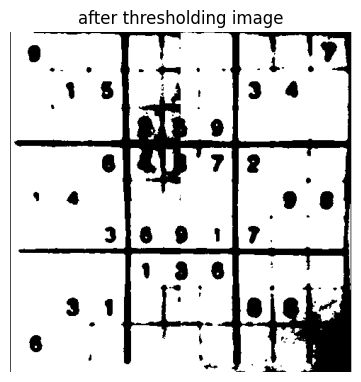

In [ ]:
def optimal_thresholding(image):
    # Convert the image to grayscale if it's not already
    if len(image.shape) > 2:
        image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    # Initialize the final binary image
    final_image = np.zeros_like(image)

    # Split the image into four equal parts
    height, width = image.shape
    half_height = height // 2
    half_width = width // 2

    # Define the thresholds for each section
    thresholds = np.zeros(4)

    # Iterate over each section of the image
    for i in range(2):
        for j in range(2):
            # Define the coordinates for the current section
            start_row = i * half_height
            end_row = (i + 1) * half_height
            start_col = j * half_width
            end_col = (j + 1) * half_width
            print('start_row =', start_row, 'end_row =', end_row, 'start_col =', start_col, 'end_col =', end_col)

            # Extract the current section of the image
            section = image[start_row:end_row, start_col:end_col]

            background_pixels = np.array([section[0, 0], section[0, -1], section[-1, 0], section[-1, -1]])
            print('background_pixels =', background_pixels)


            # Define the remainder as object pixels
            object_pixels = image.ravel()
            object_pixels = object_pixels[~np.isin(object_pixels, background_pixels)]
            print('object_pixels =', object_pixels)

            # Initialize threshold value
            threshold = 0

            # Start the iterative process
            while True:
                # Compute mean background and object gray-level
                mean_background = np.mean(background_pixels)
                print('mean_background =', mean_background)
                mean_object = np.mean(object_pixels)
                print('mean_object =', mean_object)

                # Calculate new threshold
                new_threshold = (mean_background + mean_object) / 2
                print('new_threshold =', new_threshold)

                thresholds[i * 2 + j] = new_threshold

                # If threshold doesn't change, break the loop
                if abs(new_threshold - threshold) < 0.01:
                    break

                threshold = new_threshold

                background_pixels = section[section < threshold]
                print('background_pixels =', background_pixels)
                object_pixels = section[section > threshold]
                print('object_pixels =', object_pixels)

                # Apply the final threshold to the image
            # final_image[start_row:end_row, start_col:end_col]  = global_thresholding(image[start_row:end_row, start_col:end_col],threshold)




            # Apply the threshold to the current section

    # final_image = local_thresholding(image, thresholds[0], thresholds[1], thresholds[2], thresholds[3])

    return thresholds


after_thresholding_image = local_thresholding(original_image_array)
# after_thresholding_image = optimal_thresholding(original_image_array)
# # Example usage
# input_img = cv.imread('your_image_path.jpg')
# output_img = optimal_thresholding(input_img)
# cv.imwrite('optimal_thresholding_output.png', output_img)

plt.figure(figsize=(15, 5))
# after thresholding image
plt.subplot(1, 3, 1)
plt.imshow(after_thresholding_image, cmap = 'gray')
plt.title('after thresholding image')
plt.axis('off')
plt.show()


## Otsu Thresholding

In [ ]:
# function for displaying image
def display(img):
    plt.figure(figsize=(5,5))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

from google.colab import files
uploaded = files.upload()


Saving orange.jpg to orange (6).jpg


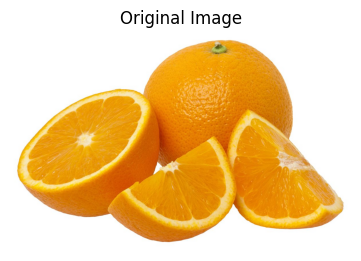

In [ ]:

image_bytes = uploaded['orange (6).jpg']

# Open the image from bytes
original_image = Image.open(io.BytesIO(image_bytes))

# Convert the image to a NumPy array
original_image_array = np.array(original_image)

plt.figure(figsize=(15, 5))
# Original image
plt.subplot(1, 3, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

### Global

<ipython-input-25-3de812b3c92d>:16: RuntimeWarning: invalid value encountered in divide
  m1 = np.sum(intensity_arr[:t]*his[:t]) / float(p1)


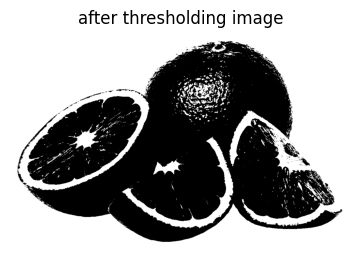

In [ ]:
from sys import ps1
def otsu_threshold(image):
    pixel_number = image.shape[0] * image.shape[1]
    mean_weight = 1.0/pixel_number
    his, bins = np.histogram(image, np.arange(0,257))
    final_thresh = -1
    final_variance = -1
    intensity_arr = np.arange(256)

    for t in bins[0:-1]:
        p1 = np.sum(his[:t])
        p2 = np.sum(his[t:])
        W1 = p1 * mean_weight
        W2 = p2 * mean_weight

        m1 = np.sum(intensity_arr[:t]*his[:t]) / float(p1)
        m2 = np.sum(intensity_arr[t:]*his[t:]) / float(p2)

        variance = W1 * W2 * (m1 - m2) ** 2 # calculate the between class variance (maximize inter-class variance)

        if variance > final_variance:
            final_thresh = t
            final_variance = variance

    return final_thresh

otsu_threshold = otsu_threshold(original_image_array)
final_image = global_thresholding(original_image_array,otsu_threshold )

plt.figure(figsize=(15, 5))
# after thresholding image
plt.subplot(1, 3, 1)
plt.imshow(final_image, cmap = 'gray')
plt.title('after thresholding image')
plt.axis('off')
plt.show()

<ipython-input-22-d352f53dd033>:15: RuntimeWarning: invalid value encountered in divide
  mub = np.sum(intensity_arr[:t]*his[:t]) / float(pcb) # calculating the mean of the background (multiply the background


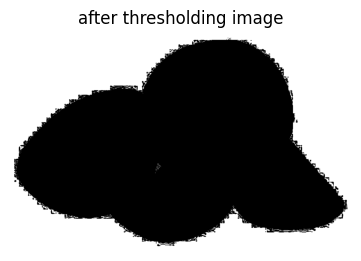

In [ ]:
import numpy as np

def otsu_threshold(image):
    pixel_number = image.shape[0] * image.shape[1] # number of pixels
    mean_weight = 1.0/pixel_number # sum of all weights
    his, bins = np.histogram(image, np.arange(0,257)) # calculating the histogram of the image
    final_thresh = -1 # defining the best threshold calculated
    final_variance = np.inf # defining the highest between class variance
    intensity_arr = np.arange(256) # creating array of all the possible pixel values (0-255)
    # Iterating through all the possible pixel values from the histogram as thresholds
    for t in bins[0:-1]:
        pcb = np.sum(his[:t]) # summing the frequency of the values before the threshold (background)
        pcf = np.sum(his[t:]) # summing the frequency of the values after the threshold (foreground)

        mub = np.sum(intensity_arr[:t]*his[:t]) / float(pcb) # calculating the mean of the background (multiply the background
        # pixel value with its weight, then divide it with the sum of frequencies of the background)
        muf = np.sum(intensity_arr[t:]*his[t:]) / float(pcf) # calculating the mean of the foreground

        mg = pcb*mub+pcf*muf
        sigma_g_square = np.sum(((intensity_arr[:t]-mg)**2) *his[:t])
        sigma_b_square = pcb * (mub - mg) ** 2 + pcf * (muf - mg) ** 2
        eta = sigma_b_square/sigma_g_square

        if eta < final_variance: # compare the variance in each step with the previous
            final_thresh = t
            final_variance = eta

    return final_thresh


otsu_threshold = otsu_threshold(original_image_array)
final_image = global_thresholding(original_image_array,otsu_threshold )

plt.figure(figsize=(15, 5))
# after thresholding image
plt.subplot(1, 3, 1)
plt.imshow(final_image, cmap = 'gray')
plt.title('after thresholding image')
plt.axis('off')
plt.show()

### Local

<ipython-input-33-8a61c3abb1c7>:16: RuntimeWarning: invalid value encountered in divide
  m1 = np.sum(intensity_arr[:t]*his[:t]) / float(p1)


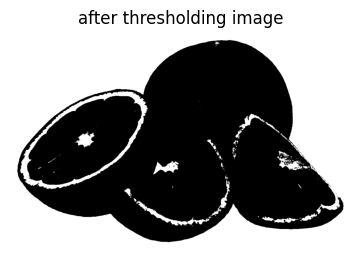

In [ ]:
from sys import ps1
def otsu_threshold(image):
    pixel_number = image.shape[0] * image.shape[1]
    mean_weight = 1.0/pixel_number
    his, bins = np.histogram(image, np.arange(0,257))
    final_thresh = -1
    final_variance = -1
    intensity_arr = np.arange(256)

    for t in bins[0:-1]:
        p1 = np.sum(his[:t])
        p2 = np.sum(his[t:])
        W1 = p1 * mean_weight
        W2 = p2 * mean_weight

        m1 = np.sum(intensity_arr[:t]*his[:t]) / float(p1)
        m2 = np.sum(intensity_arr[t:]*his[t:]) / float(p2)

        variance = W1 * W2 * (m1 - m2) ** 2 # calculate the between class variance (maximize inter-class variance)

        if variance > final_variance:
            final_thresh = t
            final_variance = variance

    return final_thresh

def local_thresholding(image):
    """
    Apply local thresholding on the input image to create a binary image.

    Parameters:
    - image: the input image to be thresholded
    - t1: the threshold value for the top-left section of the image
    - t2: the threshold value for the top-right section of the image
    - t3: the threshold value for the bottom-left section of the image
    - t4: the threshold value for the bottom-right section of the image

    Returns:
    - final_img: the binary image after thresholding
    """
    # If the image is colored, change it to grayscale, otherwise take the image as it is
    if (image.ndim == 3):
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    elif (image.ndim == 2):
        gray = image

    height, width = gray.shape # get the height and width of the image
    # In this case we will divide the image into a 2x2 grid image
    half_height = height//2
    half_width = width//2

    # Getting the four section of the 2x2 image
    section_1 = gray[:half_height, :half_width]
    section_2 = gray[:half_height, half_width:]
    section_3 = gray[half_height:, :half_width]
    section_4 = gray[half_height:, half_width:]


    t1 = otsu_threshold(section_1)
    t2 = otsu_threshold(section_2)
    t3 = otsu_threshold(section_3)
    t4 = otsu_threshold(section_4)
    # Applying the threshold of each section on its corresponding section
    section_1[section_1 > t1] = 255
    section_1[section_1 < t1] = 0

    section_2[section_2 > t2] = 255
    section_2[section_2 < t2] = 0

    section_3[section_3 > t3] = 255
    section_3[section_3 < t3] = 0

    section_4[section_4 > t4] = 255
    section_4[section_4 < t4] = 0

    # Regroup the sections to form the final image
    top_section = np.concatenate((section_1, section_2), axis = 1)
    bottom_section = np.concatenate((section_3, section_4), axis = 1)
    final_img = np.concatenate((top_section, bottom_section), axis=0)

        # final_img = gray.copy()
        # final_img[gray > t] = 255
        # final_img[gray < t] = 0

    return final_img

final_image = local_thresholding(original_image_array)

plt.figure(figsize=(15, 5))
# after thresholding image
plt.subplot(1, 3, 1)
plt.imshow(final_image, cmap = 'gray')
plt.title('after thresholding image')
plt.axis('off')
plt.show()

## spectral thresholding

### Global

In [3]:
# function for displaying image
def display(img):
    plt.figure(figsize=(5,5))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

from google.colab import files
uploaded = files.upload()

Saving orange.jpg to orange.jpg


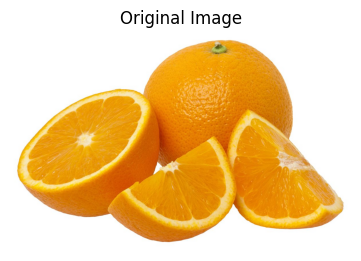

In [6]:

image_bytes = uploaded['orange.jpg']

# Open the image from bytes
original_image = Image.open(io.BytesIO(image_bytes))

# Convert the image to a NumPy array
original_image_array = np.array(original_image)

plt.figure(figsize=(15, 5))
# Original image
plt.subplot(1, 3, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

low_threshold 140 high_threshold 212


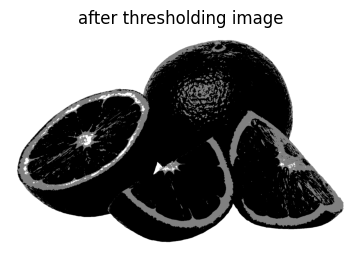

In [ ]:
def spectral_threshold(img):

    hist, _ = np.histogram(img, 256, [0, 256])
    mean = np.sum(np.arange(256)*hist)/float(img.size)
    low_threshold = 0
    high_threshold = 0
    max_variance = 0
    for high in range(0,256):
      for low in range(0,high):
        w0 = np.sum(hist[0:low])
        if w0 == 0:
          continue
        mean0 = np.sum(np.arange(0, low) * hist[0:low]) / float(w0)
        w1 = np.sum(hist[low:high])
        if w1 == 0:
          continue
        mean1 = np.sum(np.arange(low, high) * hist[low:high]) / float(w1)
        w2 = np.sum(hist[high:])
        if w2 == 0:
          continue
        mean2 = np.sum(np.arange(high, 256) * hist[high:]) / float(w2)
        variance = w0*(mean0-mean)**2 + w1*(mean1-mean)**2 + w2*(mean2-mean)**2
        if variance>max_variance:
          max_variance = variance
          low_threshold = low
          high_threshold = high

    print('low_threshold',low_threshold,'high_threshold',high_threshold)
    binary = np.zeros(img.shape, dtype=np.uint8)
    binary[img < low_threshold] = 0
    binary[(img >= low_threshold) & (img < high_threshold)] = 128
    binary[img >= high_threshold] = 255
    return binary

gray = cv2.cvtColor(original_image_array, cv2.COLOR_BGR2GRAY)
final_image = spectral_threshold(gray)

plt.figure(figsize=(15, 5))
# after thresholding image
plt.subplot(1, 3, 1)
plt.imshow(final_image, cmap = 'gray')
plt.title('after thresholding image')
plt.axis('off')
plt.show()


### Local

low_threshold1 157 high_threshold4 225
low_threshold2 130 high_threshold4 202
low_threshold3 108 high_threshold4 189
low_threshold4 142 high_threshold4 213


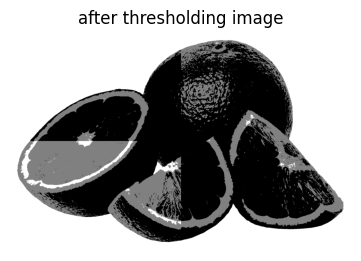

In [9]:
import cv2
def spectral_threshold(img):

    hist, _ = np.histogram(img, 256, [0, 256])
    mean = np.sum(np.arange(256)*hist)/float(img.size)
    low_threshold = 0
    high_threshold = 0
    max_variance = 0
    for high in range(0,256):
      for low in range(0,high):
        w0 = np.sum(hist[0:low])
        if w0 == 0:
          continue
        mean0 = np.sum(np.arange(0, low) * hist[0:low]) / float(w0)
        w1 = np.sum(hist[low:high])
        if w1 == 0:
          continue
        mean1 = np.sum(np.arange(low, high) * hist[low:high]) / float(w1)
        w2 = np.sum(hist[high:])
        if w2 == 0:
          continue
        mean2 = np.sum(np.arange(high, 256) * hist[high:]) / float(w2)
        variance = w0*(mean0-mean)**2 + w1*(mean1-mean)**2 + w2*(mean2-mean)**2
        if variance>max_variance:
          max_variance = variance
          low_threshold = low
          high_threshold = high


    binary = np.zeros(img.shape, dtype=np.uint8)
    binary[img < low_threshold] = 0
    binary[(img >= low_threshold) & (img < high_threshold)] = 128
    binary[img >= high_threshold] = 255
    return binary, low_threshold,high_threshold


def local_thresholding(image):
    """
    Apply local thresholding on the input image to create a binary image.

    Parameters:
    - image: the input image to be thresholded
    - t1: the threshold value for the top-left section of the image
    - t2: the threshold value for the top-right section of the image
    - t3: the threshold value for the bottom-left section of the image
    - t4: the threshold value for the bottom-right section of the image

    Returns:
    - final_img: the binary image after thresholding
    """
    # If the image is colored, change it to grayscale, otherwise take the image as it is
    if (image.ndim == 3):
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    elif (image.ndim == 2):
        gray = image

    height, width = gray.shape # get the height and width of the image
    # In this case we will divide the image into a 2x2 grid image
    half_height = height//2
    half_width = width//2

    # Getting the four section of the 2x2 image
    section_1 = gray[:half_height, :half_width]
    section_2 = gray[:half_height, half_width:]
    section_3 = gray[half_height:, :half_width]
    section_4 = gray[half_height:, half_width:]


    # t1 = otsu_threshold(section_1)
    # t2 = otsu_threshold(section_2)
    # t3 = otsu_threshold(section_3)
    # t4 = otsu_threshold(section_4)
    # # Applying the threshold of each section on its corresponding section
    # section_1[section_1 > t1] = 255
    # section_1[section_1 < t1] = 0

    # section_2[section_2 > t2] = 255
    # section_2[section_2 < t2] = 0

    # section_3[section_3 > t3] = 255
    # section_3[section_3 < t3] = 0

    # section_4[section_4 > t4] = 255
    # section_4[section_4 < t4] = 0

    section_1, low_threshold1,high_threshold1 = spectral_threshold(section_1)
    print('low_threshold1',low_threshold1,'high_threshold4',high_threshold1)
    section_2, low_threshold2,high_threshold2 = spectral_threshold(section_2)
    print('low_threshold2',low_threshold2,'high_threshold4',high_threshold2)
    section_3, low_threshold3,high_threshold3 = spectral_threshold(section_3)
    print('low_threshold3',low_threshold3,'high_threshold4',high_threshold3)
    section_4, low_threshold4,high_threshold4 = spectral_threshold(section_4)
    print('low_threshold4',low_threshold4,'high_threshold4',high_threshold4)

    # Regroup the sections to form the final image
    top_section = np.concatenate((section_1, section_2), axis = 1)
    bottom_section = np.concatenate((section_3, section_4), axis = 1)
    final_img = np.concatenate((top_section, bottom_section), axis=0)

        # final_img = gray.copy()
        # final_img[gray > t] = 255
        # final_img[gray < t] = 0

    return final_img

gray = cv2.cvtColor(original_image_array, cv2.COLOR_BGR2GRAY)
final_image = local_thresholding(gray)

plt.figure(figsize=(15, 5))
# after thresholding image
plt.subplot(1, 3, 1)
plt.imshow(final_image, cmap = 'gray')
plt.title('after thresholding image')
plt.axis('off')
plt.show()
